In [1]:
import sys
sys.path.insert(0, '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
import pymysql
import csv

## Build Database 

In [2]:
class YelpDb:
    """ Yelp Database Configurations
    """
    def __init__(self, ):
        """ db connection
        """
        self.host = "localhost"
        self.user = "root"
        self.password = "skrskr220"
        self.db = "yelp_info_db"
        self.charset = 'utf8'
        self.conn = pymysql.connect(host=self.host,
                                    user=self.user,
                                    password=self.password,
                                    db=self.db,
                                    charset=self.charset)
        self.cursor = self.conn.cursor()  # set a cursor object
        
    def create_yelp_table_1(self, table_name):
        """ Create table in the yelp_info_db based on properties 
        """
        self.cursor.execute("DROP TABLE IF EXISTS " + table_name)
        sql = f"""CREATE TABLE {table_name} (
              `Address` char(255) DEFAULT NULL,
              `Amenities` varchar(5000) DEFAULT NULL,
              `Category` char(255) DEFAULT NULL,
              `Highlights` char(255) DEFAULT NULL,
              `Name` char(255) DEFAULT NULL,
              `Open_hours` varchar(500) DEFAULT NULL,
              `Phone` char(20) DEFAULT NULL,
              `Price` char(20) DEFAULT NULL,
              `Rating` char(20) DEFAULT NULL,
              `Reviews` char(20) DEFAULT NULL)"""
        self.cursor.execute(sql)
        print("Created table Successfully.")
    
    def create_yelp_table(self, table_name):
        """ Create table in the yelp_info_db based on properties 
        """
        self.cursor.execute("DROP TABLE IF EXISTS " + table_name)
        sql = f"""CREATE TABLE {table_name} (
              `Address` char(255),
              `Amenities` varchar(2000),
              `Category` char(255),
              `Highlights` char(255),
              `Name` char(255),
              `Open_hours` varchar(500),
              `Phone` char(20),
              `Price` char(20),
              `Rating` char(20),
              `Reviews` char(20))"""
        self.cursor.execute(sql)
        print("Created table Successfully.")
        
    def csv_to_db(self, csv_path, table_name):
        """ Convert .csv files into database 
        """
        with open(csv_path) as csv_file:
            csv_data = csv.reader(csv_file, delimiter=',')
            next(csv_data)
            for row in csv_data:
                # print(row)
                self.cursor.execute(f'INSERT INTO {table_name} (Address, \
                  Amenities, Category, Highlights, Name, Open_hours, \
                               Phone, Price, Rating, Reviews) \
                                    VALUES("%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s", "%s")', row)
            self.conn.commit()
            print("Finsihed read csv into db.")

    def execute(self, sql):
        """ Test sql execution
        """
        try:
            self.cursor.execute(sql)
            self.conn.commit()
        except pymysql.Error:
            self.conn.rollback()
            print(sql)

    def fetch_all(self):
        return self.cursor.fetchall()

    def fetch_one(self):
        return self.cursor.fetchone()

    def close(self):
        self.cursor.close()
        self.conn.close()  # disconnect from server

In [3]:
yelp_db_test = YelpDb()

In [4]:
yelp_db_test.create_yelp_table('YELP_SF')

Created table Successfully.


In [5]:
csv_path = '../Database/Yelp_all.csv'
yelp_db_test.csv_to_db(csv_path, 'YELP_SF')
yelp_db_test.close()

Finsihed read csv into db.


In [ ]:
yelp_db_test.fetch_one()


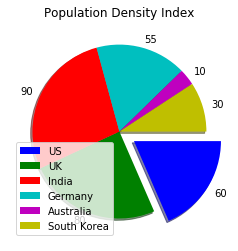

In [2]:
import matplotlib.pyplot as plt
 
values = [60, 80, 90, 55, 10, 30]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['US', 'UK', 'India', 'Germany', 'Australia', 'South Korea']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Population Density Index')
plt.legend(labels,loc=3)